# 准备数据

In [1]:
# 过滤Alphalens的warning
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# 加载模块
import polars as pl

from vnpy.trader.constant import Interval

from vnpy.alpha import AlphaLab

In [3]:
# 创建数据中心
lab: AlphaLab = AlphaLab("./lab/csi300")

In [4]:
# 设置任务参数
name = "300_lasso"
index_symbol: str = "000300.SSE"
start: str = "2008-01-01"
end: str = "2023-12-31"
interval: Interval = Interval.DAILY
extended_days: int = 100

In [5]:
# 加载所有成分股代码
component_symbols: list[str] = lab.load_component_symbols(index_symbol, start, end)

# 特征计算

In [6]:
# 加载模块
from functools import partial

from vnpy.trader.constant import Interval

from vnpy.alpha.dataset import (
    AlphaDataset,
    process_drop_na,
    process_cs_norm,
    process_fill_na,
)
from vnpy.alpha.dataset.datasets.alpha_158 import Alpha158

In [7]:
# 加载成分股数据
df: pl.DataFrame = lab.load_bar_df(
    component_symbols, interval, start, end, extended_days
)

In [8]:
df

shape: (2_668_723, 10)
┌────────────┬──────────┬──────────┬──────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ datetime   ┆ open     ┆ high     ┆ low      ┆ … ┆ turnover   ┆ open_inte ┆ vwap      ┆ vt_symbol │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---        ┆ rest      ┆ ---       ┆ ---       │
│ datetime[μ ┆ f32      ┆ f32      ┆ f32      ┆   ┆ f32        ┆ ---       ┆ f32       ┆ str       │
│ s]         ┆          ┆          ┆          ┆   ┆            ┆ f32       ┆           ┆           │
╞════════════╪══════════╪══════════╪══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2007-09-24 ┆ 0.954962 ┆ 1.04754  ┆ 0.929108 ┆ … ┆ 8.4223008e ┆ 0.0       ┆ 24.223352 ┆ 600357.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 8          ┆           ┆           ┆ E         │
│ 2007-09-25 ┆ 0.989992 ┆ 1.042535 ┆ 0.957048 ┆ … ┆ 7.33287488 ┆ 0.0       ┆ 23.723572 ┆ 600357.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ E         │
│ 2007-09-26 ┆ 0.960384 ┆ 0.972477 ┆ 0.87573  ┆ … ┆ 5.62652672 ┆ 0.0       ┆ 22.026995 ┆ 600357.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ E         │
│ 2007-09-27 ┆ 0.895746 ┆ 0.940784 ┆ 0.87573  ┆ … ┆ 3.461064e8 ┆ 0.0       ┆ 21.757658 ┆ 600357.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ E         │
│ 2007-09-28 ┆ 0.942869 ┆ 0.984153 ┆ 0.938699 ┆ … ┆ 4.96808576 ┆ 0.0       ┆ 22.917692 ┆ 600357.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ E         │
│ …          ┆ …        ┆ …        ┆ …        ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ 2024-01-04 ┆ 0.340059 ┆ 0.340059 ┆ 0.333447 ┆ … ┆ 4.0958676e ┆ 0.0       ┆ 3.558406  ┆ 000402.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
│ 2024-01-05 ┆ 0.33628  ┆ 0.342893 ┆ 0.334391 ┆ … ┆ 7.3394208e ┆ 0.0       ┆ 3.589114  ┆ 000402.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
│ 2024-01-08 ┆ 0.33817  ┆ 0.339114 ┆ 0.326834 ┆ … ┆ 6.2911928e ┆ 0.0       ┆ 3.514299  ┆ 000402.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
│ 2024-01-09 ┆ 0.326834 ┆ 0.333447 ┆ 0.32589  ┆ … ┆ 4.1279716e ┆ 0.0       ┆ 3.488683  ┆ 000402.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
│ 2024-01-10 ┆ 0.328724 ┆ 0.333447 ┆ 0.32589  ┆ … ┆ 3.6332424e ┆ 0.0       ┆ 3.490748  ┆ 000402.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ SE        │
└────────────┴──────────┴──────────┴──────────┴───┴────────────┴───────────┴───────────┴───────────┘

In [9]:
# 创建数据集对象
dataset: AlphaDataset = Alpha158(
    df,
    train_period=("2008-01-01", "2014-12-31"),
    valid_period=("2015-01-01", "2016-12-31"),
    test_period=("2017-01-01", "2020-8-31"),
)

In [10]:
# 添加数据预处理器
dataset.add_processor("learn", partial(process_drop_na, names=["label"]))
dataset.add_processor(
    "learn", partial(process_cs_norm, names=["label"], method="zscore")
)

dataset.add_processor("infer", partial(process_fill_na, fill_value=0))

In [11]:
# 收集指数成分过滤器
filters: dict[str, list[str]] = lab.load_component_filters(index_symbol, start, end)

In [12]:
# 准备特征和标签数据
dataset.prepare_data(filters, max_workers=3)

2025-03-27 07:07:55 开始计算表达式因子特征


100%|██████████| 159/159 [1:01:34<00:00, 23.23s/it]

2025-03-27 08:09:30 开始合并结果数据因子特征



0it [00:00, ?it/s]


2025-03-27 08:09:31 开始筛选成分股数据


100%|██████████| 819/819 [00:13<00:00, 62.14it/s] 


Dropped 7.9% entries from factor data: 0.4% in forward returns computation and 7.5% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std   count    count %
factor_quantile                                                           
1.0              0.000000  0.783112  0.092955  0.131673  184949  10.066775
2.0              0.000571  0.849006  0.241236  0.181801  183716   9.999663
3.0              0.010751  0.886908  0.321495  0.204981  183114   9.966896
4.0              0.016062  0.914302  0.388077  0.216530  183642   9.995635
5.0              0.027016  0.936739  0.450759  0.221084  183948  10.012290
6.0              0.047668  0.954686  0.514230  0.219328  182906   9.955574
7.0              0.071943  0.967680  0.581944  0.210957  183341   9.979251
8.0              0.101998  0.980325  0.659180  0.193256  183395   9.982191
9.0              0.148624  0.998517  0.752254  0.162710  183430   9.984096
10.0             0.234618  1.000000  0.888934  0.113950  184781  10.057630

Returns Analysis


1D     5D    10D
Ann. alpha                                      0.100 -0.035 -0.002
beta                                            0.024  0.024  0.032
Mean Period Wise Return Top Quantile (bps)     15.216  2.036  3.604
Mean Period Wise Return Bottom Quantile (bps)  -4.978  0.335  1.358
Mean Period Wise Spread (bps)                  20.194  1.717  2.422

<Figure size 640x480 with 0 Axes>

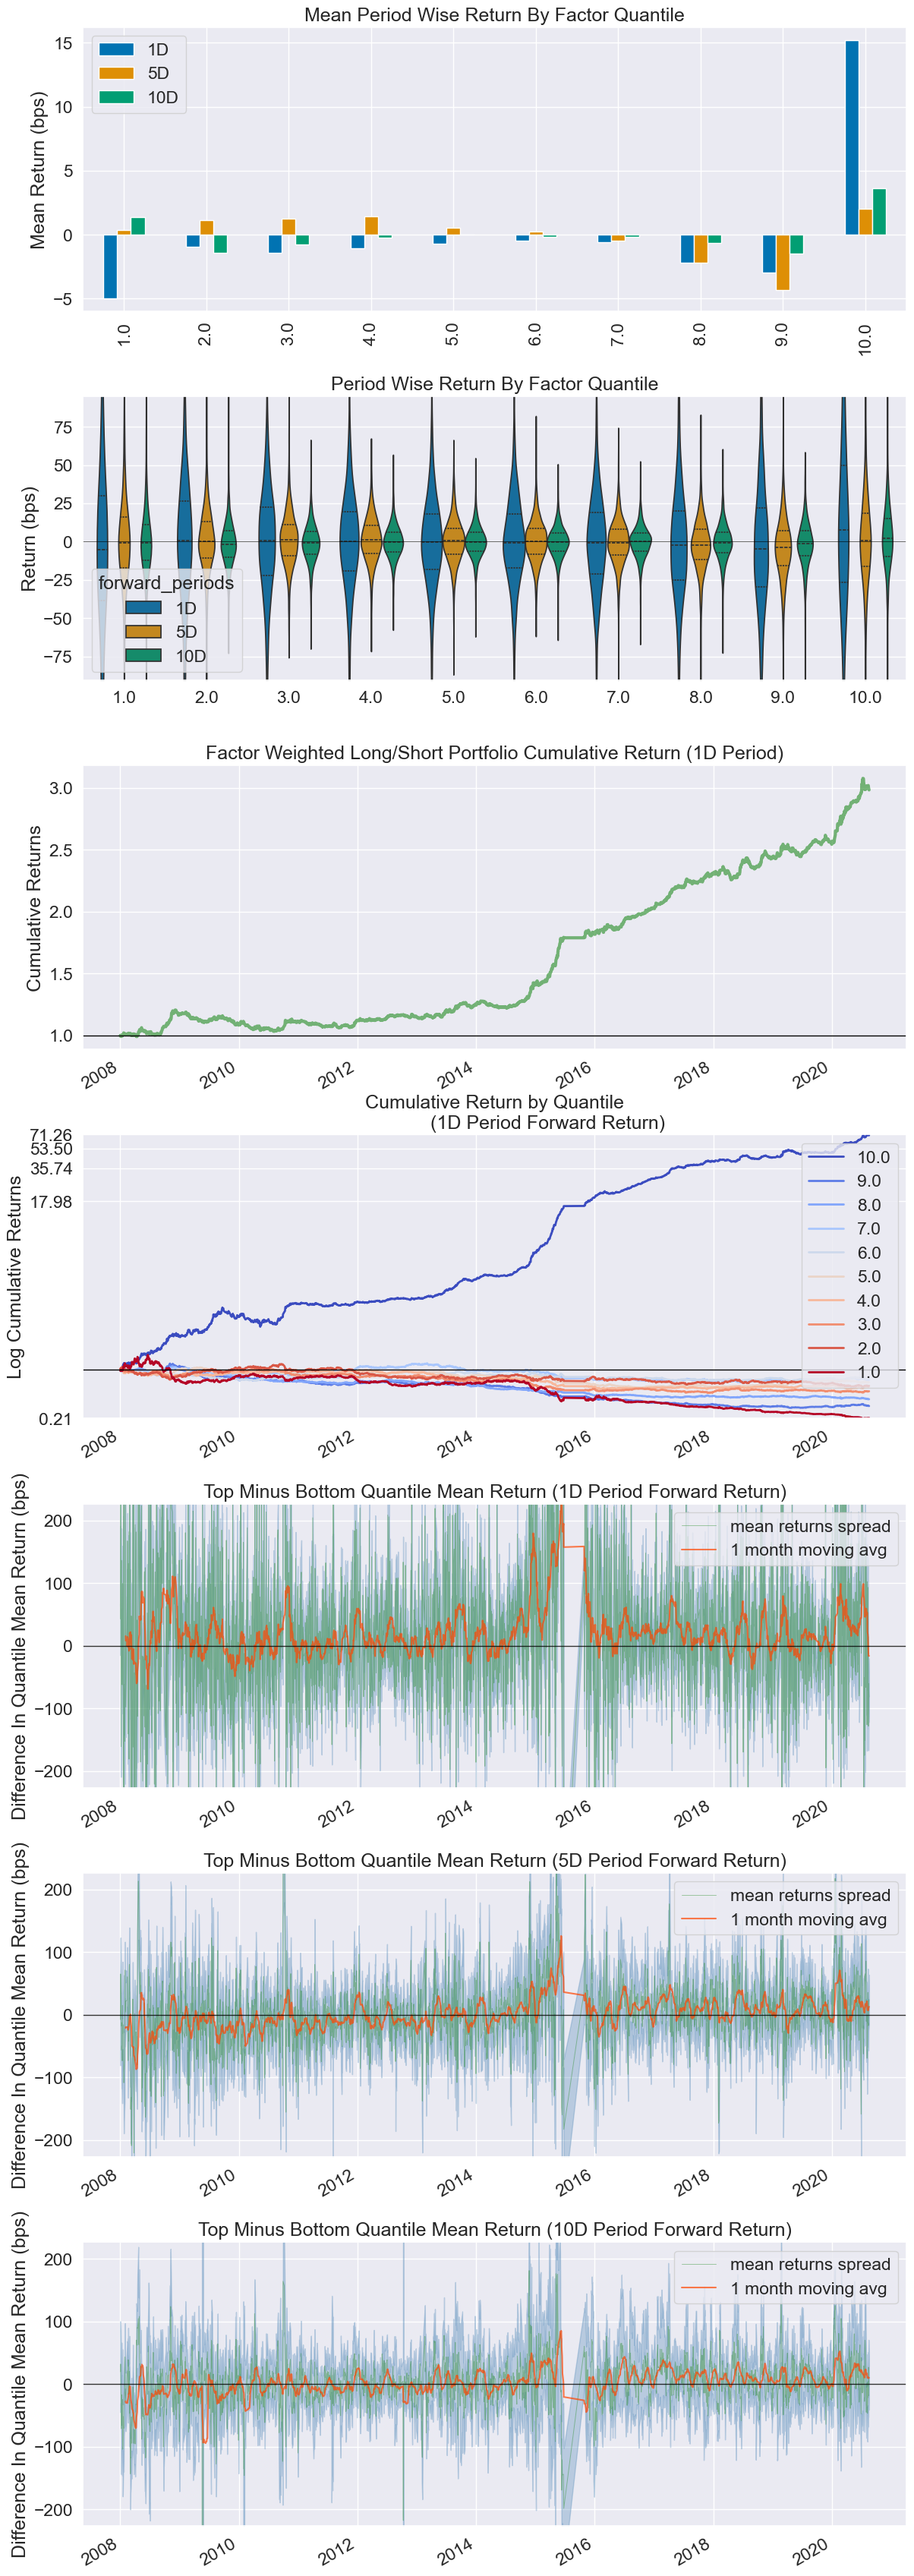

Information Analysis


1D     5D    10D
IC Mean          -0.029 -0.031 -0.005
IC Std.           0.137  0.129  0.128
Risk-Adjusted IC -0.209 -0.237 -0.038
t-stat(IC)          NaN    NaN    NaN
p-value(IC)         NaN    NaN    NaN
IC Skew             NaN    NaN    NaN
IC Kurtosis         NaN    NaN    NaN

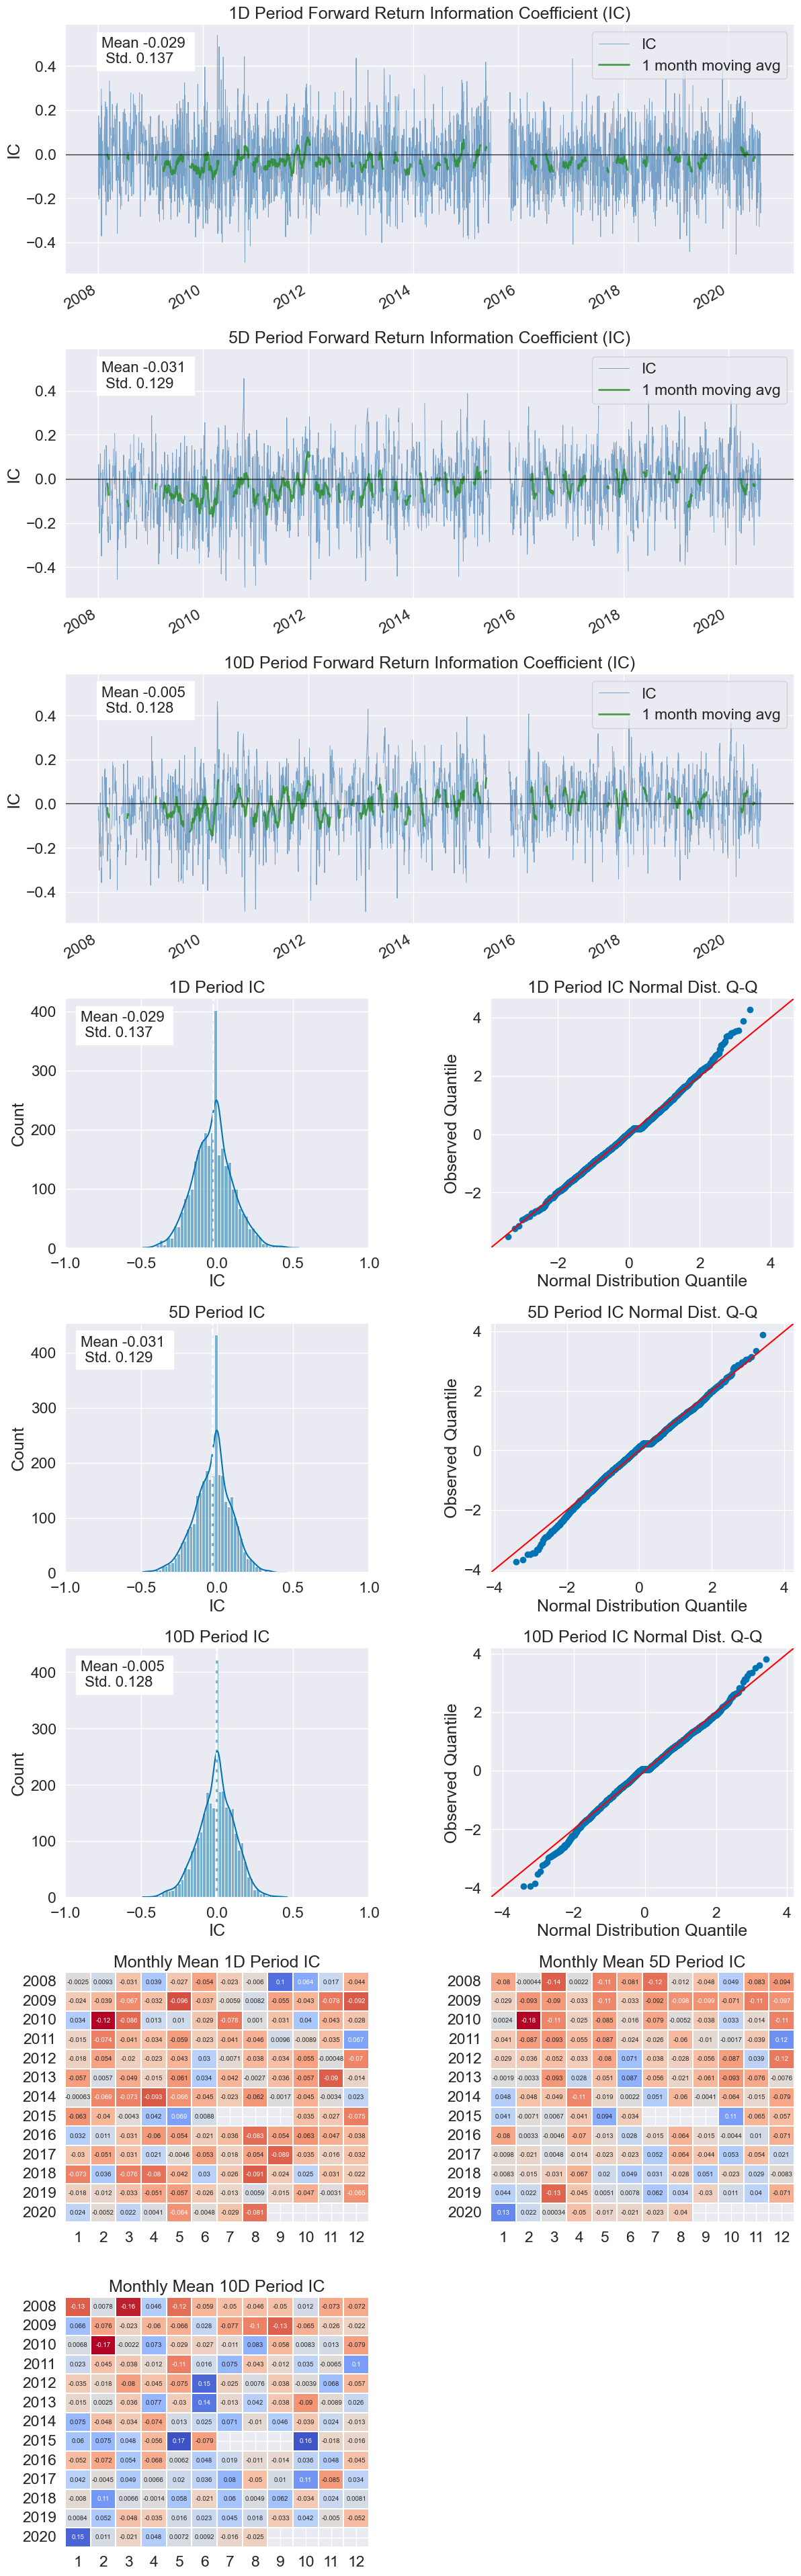

c:\Python313\Lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1.0 Mean Turnover    0.470  0.660  0.674
Quantile 2.0 Mean Turnover    0.752  0.906  0.892
Quantile 3.0 Mean Turnover    0.818  0.899  0.894
Quantile 4.0 Mean Turnover    0.845  0.894  0.893
Quantile 5.0 Mean Turnover    0.856  0.891  0.893
Quantile 6.0 Mean Turnover    0.860  0.896  0.895
Quantile 7.0 Mean Turnover    0.853  0.897  0.898
Quantile 8.0 Mean Turnover    0.835  0.899  0.896
Quantile 9.0 Mean Turnover    0.794  0.901  0.892
Quantile 10.0 Mean Turnover   0.673  0.893  0.885

1D     5D    10D
Mean Factor Rank Autocorrelation  0.605  0.038  0.083

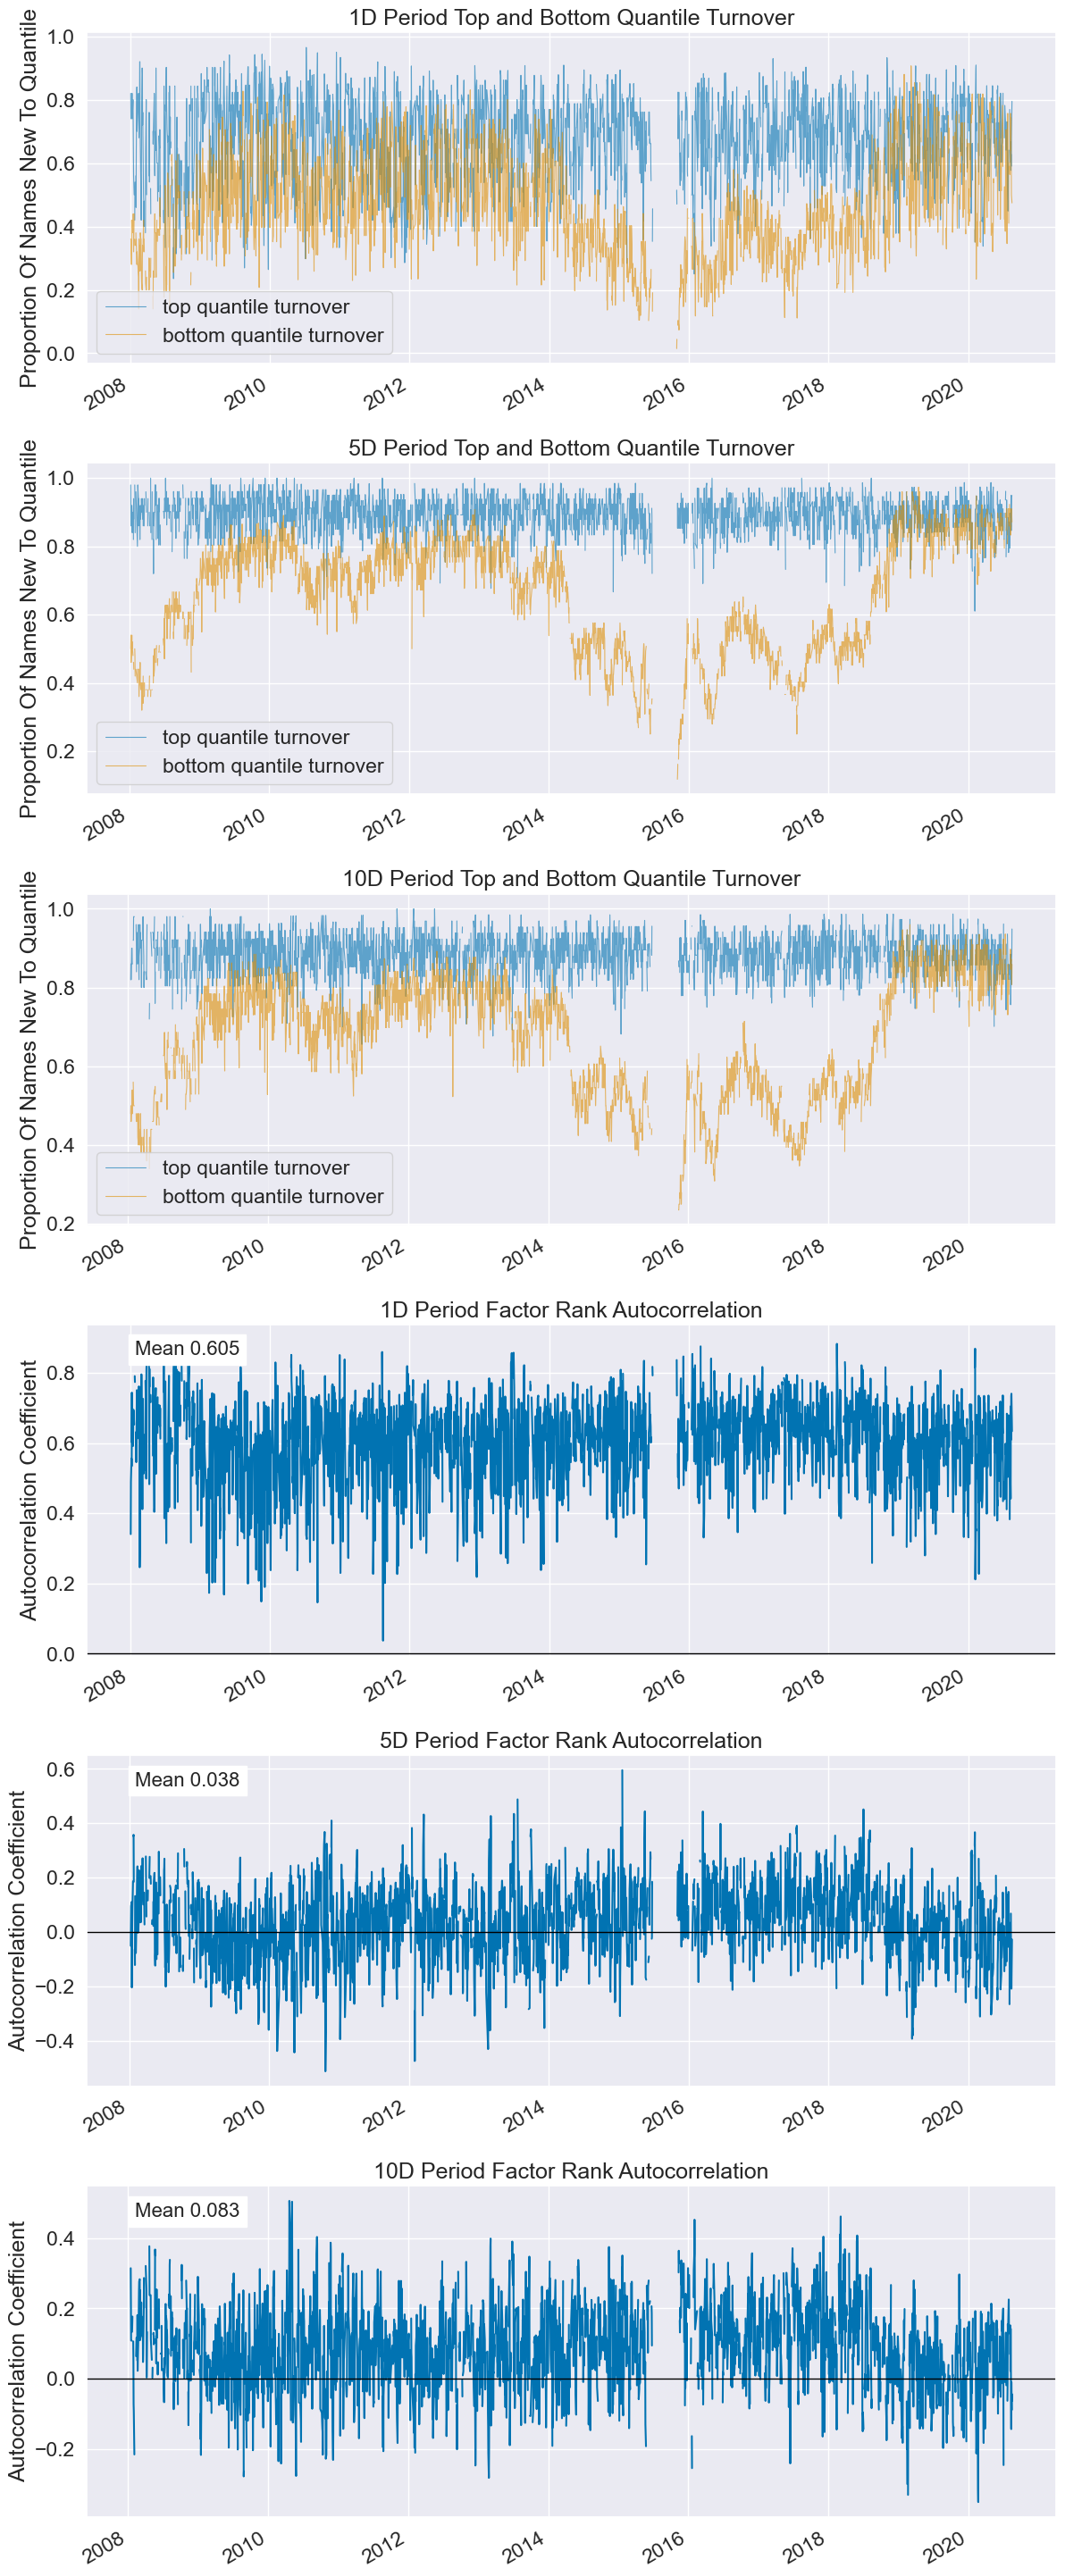

In [13]:
# 特征表现分析
dataset.show_feature_performance("rsv_5")

In [14]:
# 保存到文件缓存
lab.save_dataset(name, dataset)

# 模型训练

In [15]:
# 加载模块
import numpy as np

from vnpy.alpha import Segment, AlphaDataset, AlphaModel

from vnpy.alpha.model.models.lasso_model import LassoModel

In [16]:
# 从文件缓存加载
dataset: AlphaDataset = lab.load_dataset(name)

In [18]:
# 创建模型对象
model: AlphaModel = LassoModel()

In [19]:
# 使用数据集训练模型
model.fit(dataset)

c:\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+05, tolerance: 6.548e+01
  model = cd_fast.enet_coordinate_descent(


In [20]:
# 查看模型细节
model.detail()

2025-03-27 08:21:58 LASSO模型特征总数量: 33
2025-03-27 08:21:58 roc_30: 0.196820
2025-03-27 08:21:58 ma_5: -0.124303
2025-03-27 08:21:58 rsv_30: 0.085258
2025-03-27 08:21:58 rank_10: -0.074403
2025-03-27 08:21:58 klow_2: -0.068867
2025-03-27 08:21:58 rank_5: -0.043223
2025-03-27 08:21:58 rsv_20: 0.039640
2025-03-27 08:21:58 imxd_5: -0.035780
2025-03-27 08:21:58 rank_60: 0.035551
2025-03-27 08:21:58 qtld_5: -0.034476
2025-03-27 08:21:58 max_60: 0.032894
2025-03-27 08:21:58 imax_30: -0.028382
2025-03-27 08:21:58 rsqr_5: -0.027075
2025-03-27 08:21:58 sumd_30: 0.026038
2025-03-27 08:21:58 rsqr_10: -0.021570
2025-03-27 08:21:58 rsv_10: 0.018470
2025-03-27 08:21:58 ksft_2: -0.017125
2025-03-27 08:21:58 wvma_30: -0.013252
2025-03-27 08:21:58 rsqr_30: -0.011477
2025-03-27 08:21:58 wvma_60: -0.010925
2025-03-27 08:21:58 imin_10: 0.010450
2025-03-27 08:21:58 wvma_20: -0.008652
2025-03-27 08:21:58 imxd_60: 0.008641
2025-03-27 08:21:58 imin_5: 0.006611
2025-03-27 08:21:58 sumd_10: 0.006360
2025-03-27 08:

In [21]:
# 保存模型
lab.save_model(name, model)

# 预测信号

In [22]:
model: AlphaModel = lab.load_model(name)

In [23]:
# 用模型在测试集上预测
pre: np.ndarray = model.predict(dataset, Segment.TEST)

# 加载测试集数据
df_t: pl.DataFrame = dataset.fetch_infer(Segment.TEST)

# 合并预测信号列
df_t = df_t.with_columns(pl.Series(pre).alias("signal"))

# 提取信号数据
signal: pl.DataFrame = df_t["datetime", "vt_symbol", "signal"]

Dropped 1.1% entries from factor data: 1.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.602199  0.014336 -0.076122  0.028460  26460  10.000000
2               -0.123886  0.036826 -0.047146  0.022988  26460  10.000000
3               -0.105267  0.046764 -0.032259  0.023197  26460  10.000000
4               -0.093442  0.053732 -0.020561  0.023469  26460  10.000000
5               -0.081534  0.062443 -0.010092  0.023523  26460  10.000000
6               -0.071927  0.071107  0.000052  0.023513  26461  10.000378
7               -0.063685  0.083137  0.010526  0.023237  26459   9.999622
8               -0.053121  0.091233  0.022079  0.022783  26460  10.000000
9               -0.042419  0.105985  0.036623  0.022265  26462  10.000756
10              -0.031375  0.664922  0.065649  0.032915  26458   9.999244

Returns Analysis


1D      5D    10D
Ann. alpha                                      0.172   0.128  0.071
beta                                            0.039   0.045  0.034
Mean Period Wise Return Top Quantile (bps)      9.399   8.196  5.488
Mean Period Wise Return Bottom Quantile (bps) -12.717  -7.556 -4.030
Mean Period Wise Spread (bps)                  22.116  15.749  9.523

<Figure size 640x480 with 0 Axes>

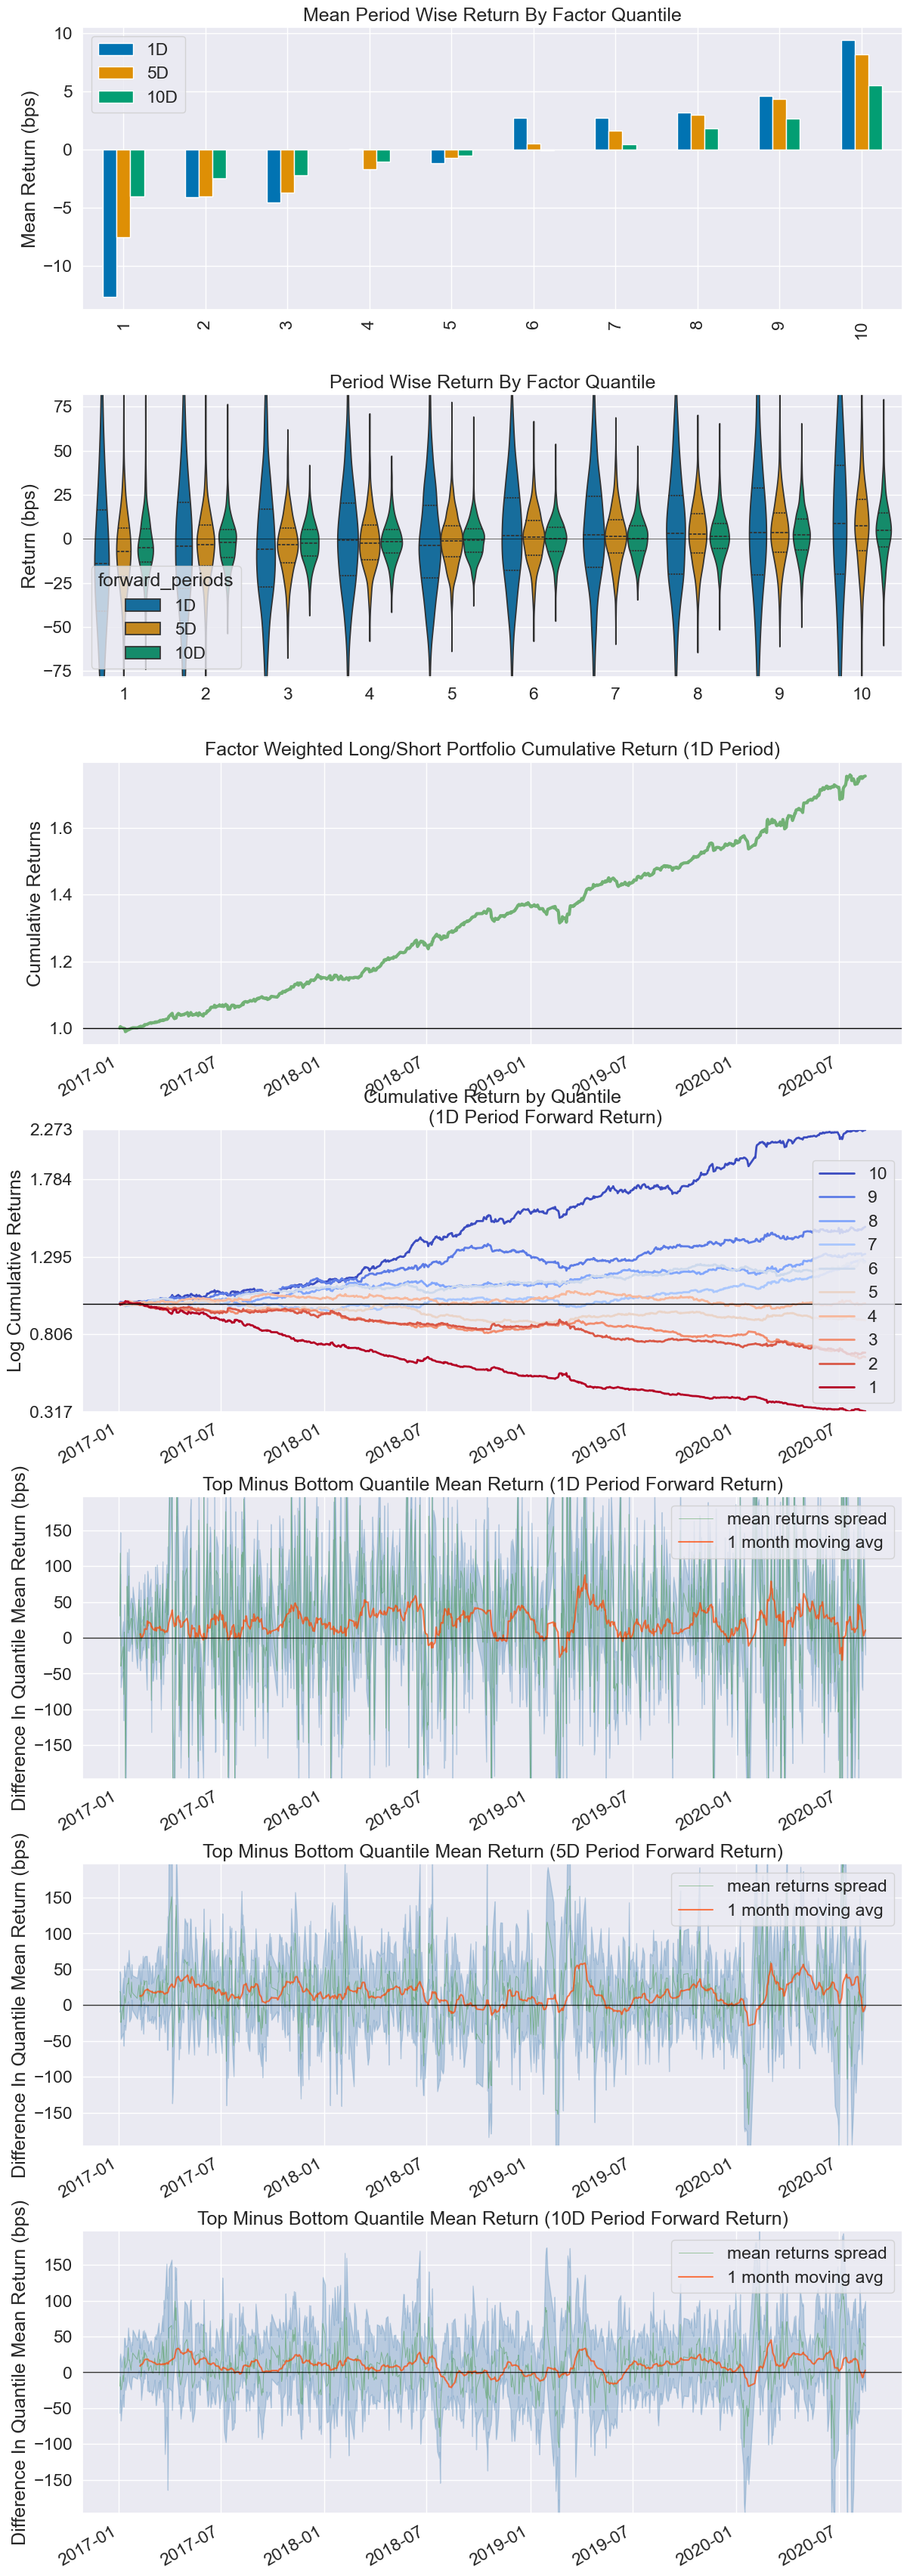

Information Analysis


1D      5D     10D
IC Mean            0.048   0.053   0.045
IC Std.            0.136   0.135   0.130
Risk-Adjusted IC   0.353   0.391   0.342
t-stat(IC)        10.488  11.620  10.150
p-value(IC)        0.000   0.000   0.000
IC Skew            0.033   0.157   0.119
IC Kurtosis        0.211   0.431   0.532

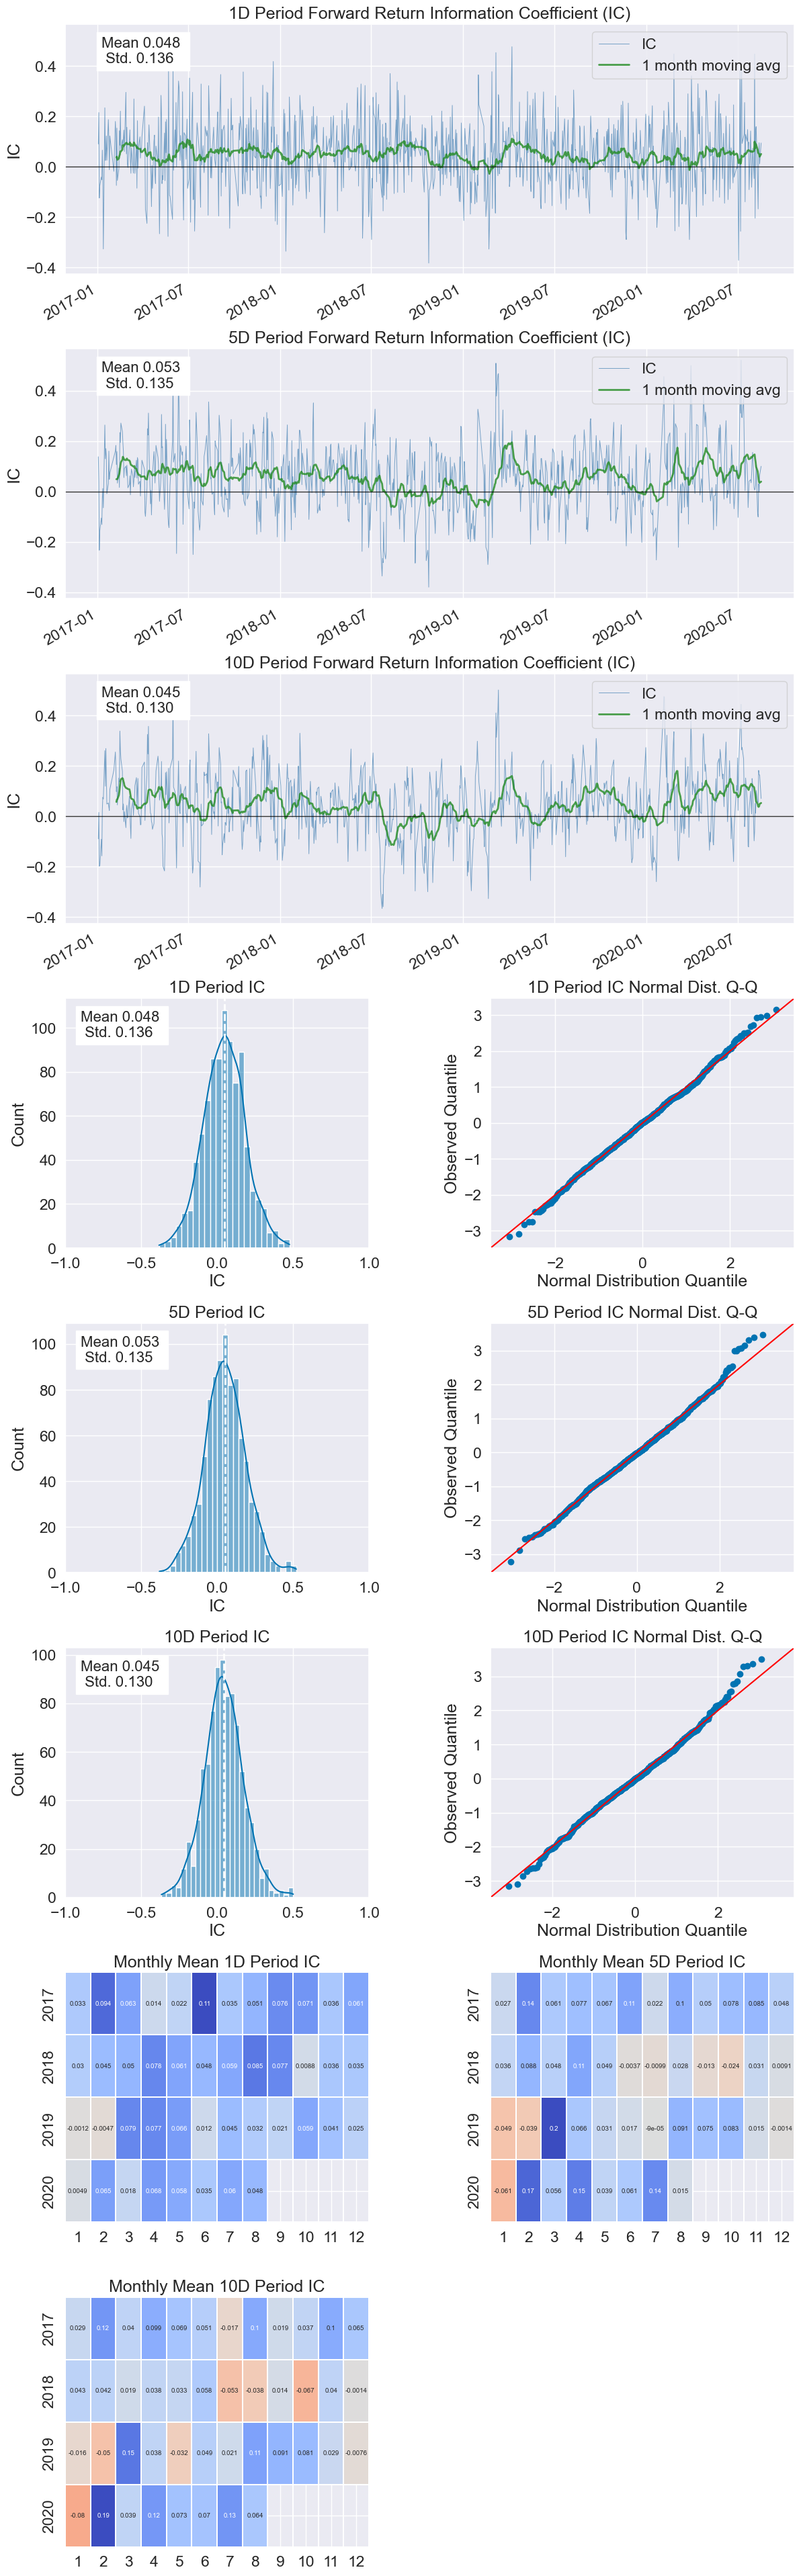

c:\Python313\Lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover    0.583  0.815  0.841
Quantile 2 Mean Turnover    0.798  0.886  0.891
Quantile 3 Mean Turnover    0.846  0.893  0.896
Quantile 4 Mean Turnover    0.857  0.899  0.897
Quantile 5 Mean Turnover    0.866  0.897  0.900
Quantile 6 Mean Turnover    0.867  0.896  0.899
Quantile 7 Mean Turnover    0.858  0.894  0.894
Quantile 8 Mean Turnover    0.836  0.889  0.893
Quantile 9 Mean Turnover    0.792  0.882  0.881
Quantile 10 Mean Turnover   0.586  0.820  0.845

1D     5D    10D
Mean Factor Rank Autocorrelation  0.594  0.173  0.116

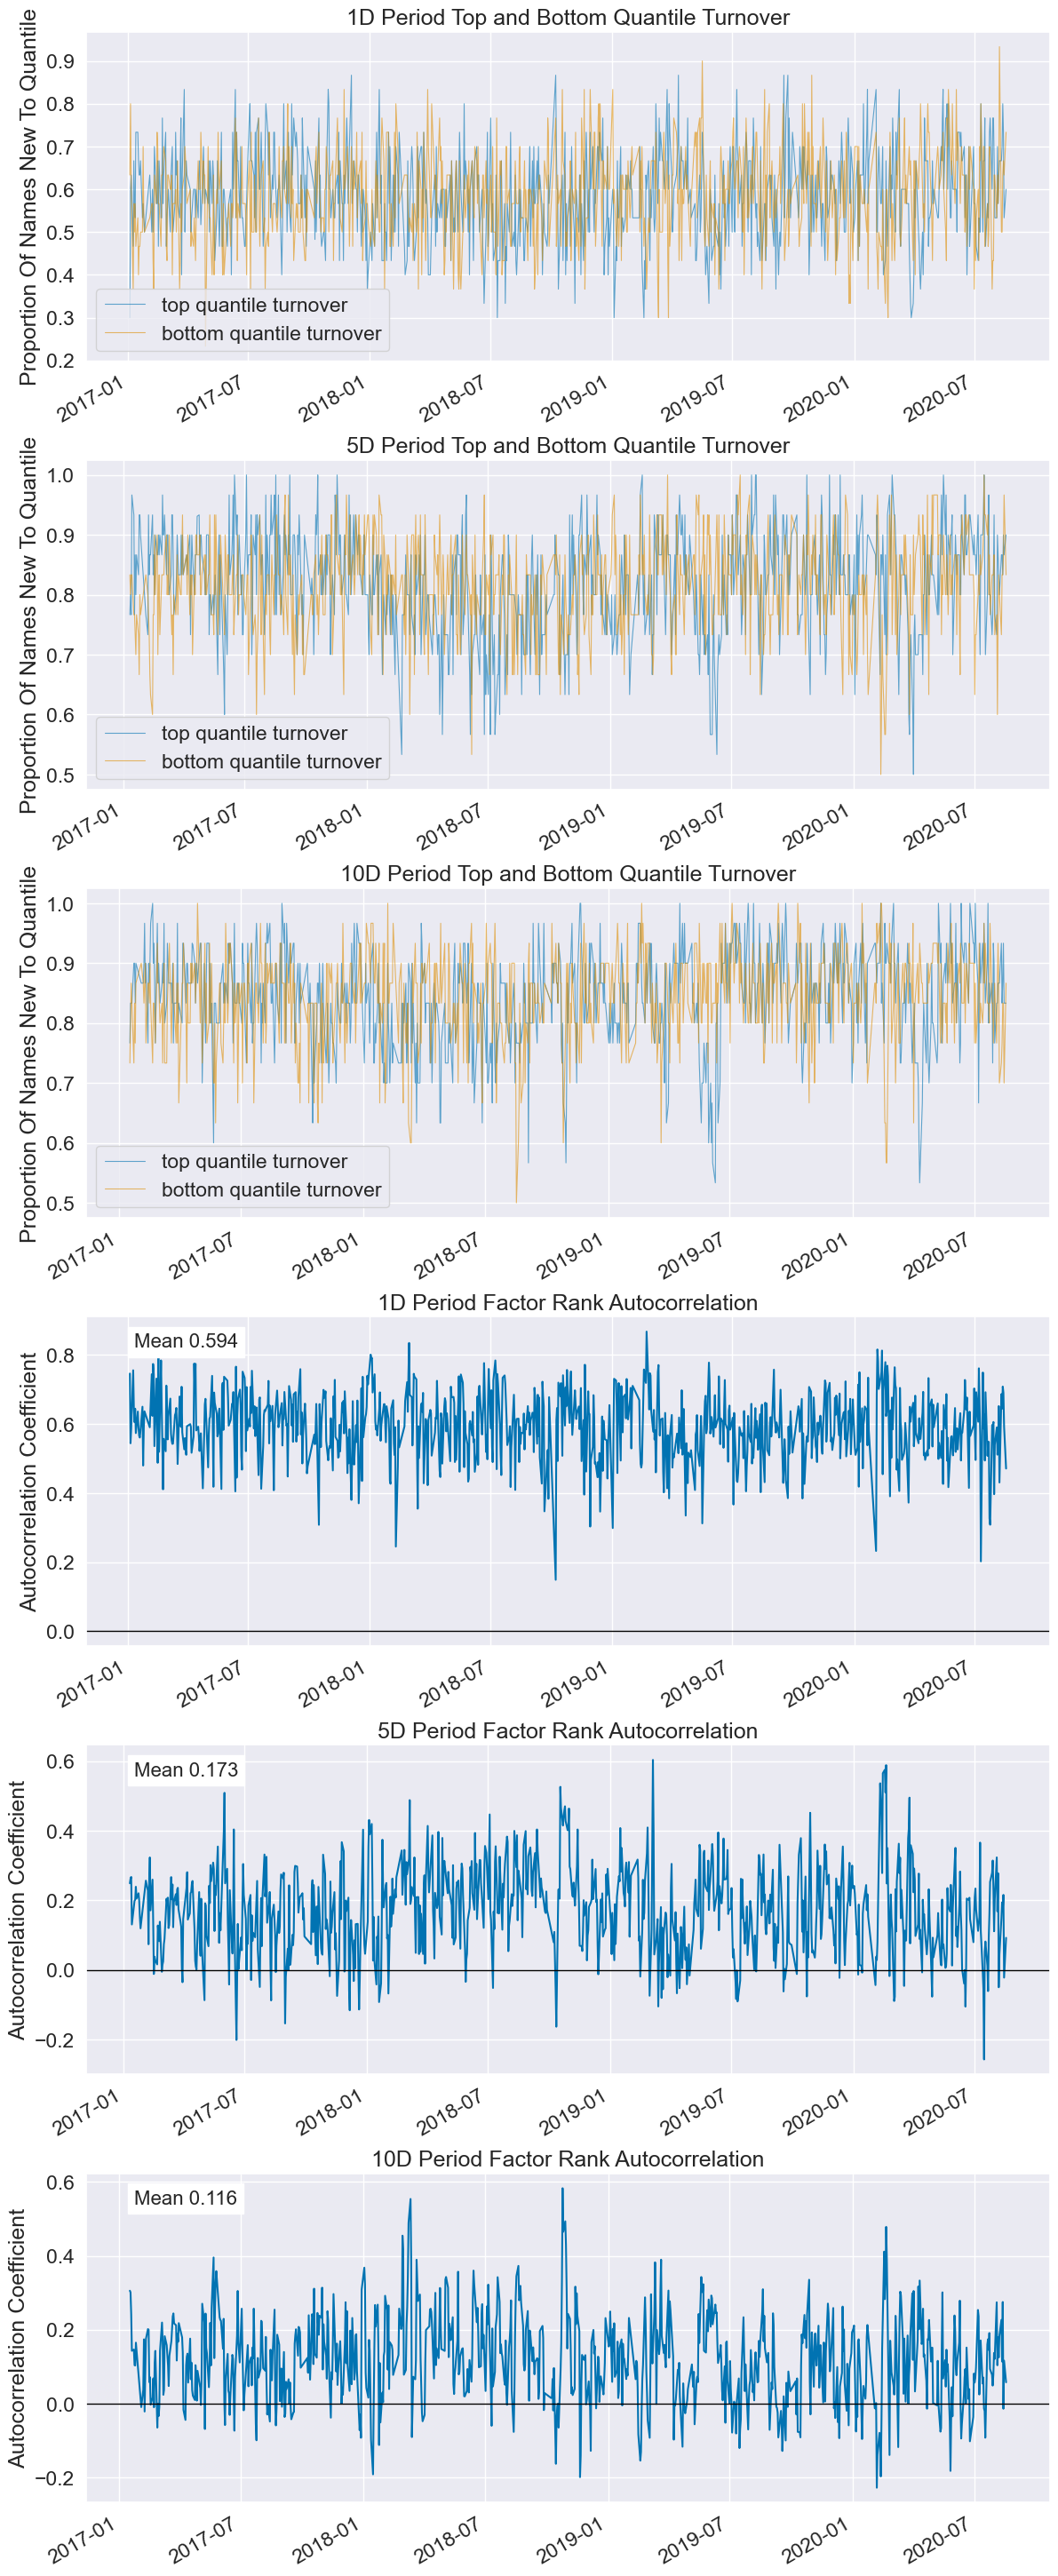

In [24]:
# 检查信号绩效
dataset.show_signal_performance(signal)

In [25]:
# 保存信号数据
lab.save_signal(name, signal)

# 策略回测

In [26]:
# 加载模块
import importlib
from datetime import datetime

from vnpy.alpha.strategy import BacktestingEngine

import vnpy.alpha.strategy.strategies.equity_demo_strategy as equity_demo_strategy

In [27]:
# 重载策略类
importlib.reload(equity_demo_strategy)
EquityDemoStrategy = equity_demo_strategy.EquityDemoStrategy

In [28]:
# 从文件加载信号数据
signal = lab.load_signal(name)

In [29]:
# 创建回测引擎对象
engine = BacktestingEngine(lab)

# 设置回测参数
engine.set_parameters(
    vt_symbols=component_symbols,
    interval=Interval.DAILY,
    start=datetime(2017, 1, 1),
    end=datetime(2020, 8, 1),
    capital=100000000,
)

# 添加策略实例
setting = {"top_k": 30, "n_drop": 3, "hold_thresh": 3}
engine.add_strategy(EquityDemoStrategy, setting, signal)

In [30]:
# 执行回测任务
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

2025-03-27 08:22:14 开始加载历史数据


100%|██████████| 819/819 [00:09<00:00, 88.25it/s] 

2025-03-27 08:22:24 部分合约历史数据为空：['600357.SSE', '688223.SSE', '600087.SSE', '600001.SSE', '000527.SZSE', '688065.SSE', '601825.SSE', '600102.SSE', '688303.SSE', '600941.SSE', '600938.SSE', '001289.SZSE', '688041.SSE', '605117.SSE', '601299.SSE', '600591.SSE', '000562.SZSE', '301269.SZSE', '300957.SZSE', '601268.SSE', '600832.SSE', '601995.SSE', '688271.SSE', '688187.SSE', '600631.SSE', '300919.SZSE', '601868.SSE', '300866.SZSE', '300979.SZSE', '600786.SSE', '000024.SZSE', '300999.SZSE', '600905.SSE', '300888.SZSE', '601728.SSE', '601059.SSE', '300896.SZSE', '605499.SSE']
2025-03-27 08:22:24 所有历史数据加载完成
2025-03-27 08:22:24 策略初始化完成
2025-03-27 08:22:24 开始回放历史数据


2025-03-27 08:22:27 历史数据回放结束
2025-03-27 08:22:27 开始计算逐日盯市盈亏
2025-03-27 08:22:28 逐日盯市盈亏计算完成
2025-03-27 08:22:28 开始计算策略统计指标
2025-03-27 08:22:28 ------------------------------
2025-03-27 08:22:28 首个交易日：  2017-01-03
2025-03-27 08:22:28 最后交易日：  2020-07-31
2025-03-27 08:22:28 总交易日：  871
2025-03-27 08:22:28 盈利交易日：  478
2025-03-27 08:22:28 亏损交易日：  392
2025-03-27 08:22:28 起始资金：  100,000,000.00
2025-03-27 08:22:28 结束资金：  208,289,325.58
2025-03-27 08:22:28 总收益率：  108.29%
2025-03-27 08:22:28 年化收益：  29.84%
2025-03-27 08:22:28 最大回撤:   -37,964,138.94
2025-03-27 08:22:28 百分比最大回撤: -27.32%
2025-03-27 08:22:28 最长回撤天数:   267
2025-03-27 08:22:28 总盈亏：  108,289,325.58
2025-03-27 08:22:28 总手续费：  15,544,796.21
2025-03-27 08:22:28 总成交金额：  20,754,228,434.74
2025-03-27 08:22:28 总成交笔数：  4953
2025-03-27 08:22:28 日均盈亏：  124,327.58
2025-03-27 08:22:28 日均手续费：  17,847.07
2025-03-27 08:22:28 日均成交金额：  23,828,046.42
2025-03-27 08:22:28 日均成交笔数：  5.686567164179104
2025-03-27 08:22:28 日均收益率：  0.09%
2025-03-27 08:22:28 收益标准差：

In [31]:
# 显示超额收益分析结果
engine.show_performance(benchmark_symbol=index_symbol)